# Movies. Microsoft. Magic.

**Authors:** Brandon Sienkiewicz, Ilan Haskel, Zach Cherna


## Overview

Microsoft is looking to get into the movie business and create an original content studio. Our goal is to answer three questions we think are important considerations, and hopefully provide them with actionable insight and recommendations. The questions we considered are as follows:

1.) Which movie genres receive the highest average ratings?

2.) Does movie runtime have an impact on ratings?

3.) What affects does production budget have on important metrics such as total gross, popularity, and moving rating?

Our data was sourced through Flatiron school and can be found here. [ProjectData](https://github.com/learn-co-curriculum/dsc-project-template/tree/template-aab/zippedData)

## Data Understanding

The provided data contains information on movies from various websites. These data sets include general information about the movies as well as more specific data such as rating, production cost, and total gross.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

conn = sqlite3.connect('zippedData/im.db')
%matplotlib inline

In [2]:
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
imbd_df = pd.read_sql("""
SELECT *
FROM movie_basics b
JOIN movie_ratings r
ON b.movie_id = r.movie_id
""", conn)

## Data Preparation and Modelling

### Analysis of Genres Vs. AverageRating

In [3]:
imbd_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.6,5


In [4]:
imbd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   movie_id         73856 non-null  object 
 7   averagerating    73856 non-null  float64
 8   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.1+ MB


In [5]:
imbd_df['genres'].isna().sum()

804

-'genres' has 804 null values out of 73856 total entries. This is equal to 1.08%, therefore we will drop the null values for 'genres'.

In [6]:
imbd_df_clean_genres = imbd_df.dropna(subset = ['genres'])

In [7]:
imbd_df_clean_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           73052 non-null  object 
 6   movie_id         73052 non-null  object 
 7   averagerating    73052 non-null  float64
 8   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.6+ MB


In [8]:
imbd_df_clean_genres['genres'].value_counts()[:50]

Drama                            11612
Documentary                      10313
Comedy                            5613
Horror                            2692
Comedy,Drama                      2617
Thriller                          1555
Drama,Romance                     1510
Comedy,Romance                    1236
Comedy,Drama,Romance              1208
Horror,Thriller                   1004
Drama,Thriller                     990
Action                             979
Romance                            717
Biography,Documentary              694
Documentary,Drama                  582
Documentary,Music                  579
Comedy,Horror                      579
Action,Crime,Drama                 562
Crime,Drama,Thriller               504
Crime,Drama                        494
Family                             491
Biography,Documentary,History      479
Drama,Family                       478
Documentary,History                476
Action,Drama                       395
Horror,Mystery,Thriller  

Examining only single-genre categories 200 or more entries. This includes: Drama, Documentary, Comedy, Horror, Thriller, Action, Romance, Family, Animation, Sci-Fi, Crime   

In [9]:
drama_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Drama'].mean()
drama_mean

C:\Users\bmsie\AppData\Local\Temp\ipykernel_22476\1613530649.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  drama_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Drama'].mean()


start_year         2014.273424
runtime_minutes      97.633723
averagerating         6.494265
numvotes            723.003875
dtype: float64

In [10]:
drama_mean_rating = drama_mean['averagerating']
drama_mean_rating

6.494264553909718

In [11]:
documentary_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Documentary'].mean()
documentary_mean

C:\Users\bmsie\AppData\Local\Temp\ipykernel_22476\2020101898.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  documentary_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Documentary'].mean()


start_year         2014.507903
runtime_minutes      88.942179
averagerating         7.293794
numvotes            173.132260
dtype: float64

In [12]:
documentary_mean_rating = documentary_mean['averagerating']
documentary_mean_rating

7.293794240279269

In [13]:
comedy_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Comedy'].mean()
comedy_mean

C:\Users\bmsie\AppData\Local\Temp\ipykernel_22476\872248338.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  comedy_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Comedy'].mean()


start_year         2014.342063
runtime_minutes      96.187880
averagerating         5.777998
numvotes           1217.181008
dtype: float64

In [14]:
comedy_mean_rating = comedy_mean['averagerating']
comedy_mean_rating

5.7779975057901325

In [15]:
horror_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Horror'].mean()
horror_mean

C:\Users\bmsie\AppData\Local\Temp\ipykernel_22476\2496419242.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  horror_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Horror'].mean()


start_year         2014.450966
runtime_minutes      85.769265
averagerating         4.835475
numvotes            589.128158
dtype: float64

In [16]:
horror_mean_rating = horror_mean['averagerating']
horror_mean_rating

4.835475482912343

In [17]:
thriller_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Thriller'].mean()
thriller_mean

C:\Users\bmsie\AppData\Local\Temp\ipykernel_22476\3849417514.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  thriller_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Thriller'].mean()


start_year         2014.702251
runtime_minutes      94.880435
averagerating         5.704244
numvotes            283.320900
dtype: float64

In [18]:
thriller_mean_rating = thriller_mean['averagerating']
thriller_mean_rating

5.704244372990354

In [19]:
action_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Action'].mean()
action_mean

C:\Users\bmsie\AppData\Local\Temp\ipykernel_22476\2844288144.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  action_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Action'].mean()


start_year         2014.271706
runtime_minutes     103.201110
averagerating         5.757712
numvotes            336.115424
dtype: float64

In [20]:
action_mean_rating = action_mean['averagerating']
action_mean_rating

5.757711950970374

In [21]:
romance_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Romance'].mean()
romance_mean

C:\Users\bmsie\AppData\Local\Temp\ipykernel_22476\3986118535.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  romance_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Romance'].mean()


start_year         2014.557880
runtime_minutes     110.408318
averagerating         6.051883
numvotes            194.746165
dtype: float64

In [22]:
romance_mean_rating = romance_mean['averagerating']
romance_mean_rating

6.051882845188289

In [23]:
family_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Family'].mean()
family_mean

C:\Users\bmsie\AppData\Local\Temp\ipykernel_22476\1196435632.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  family_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Family'].mean()


start_year         2014.739308
runtime_minutes      90.210024
averagerating         6.078004
numvotes            101.890020
dtype: float64

In [24]:
family_mean_rating = family_mean['averagerating']
family_mean_rating

6.078004073319756

In [25]:
animation_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Animation'].mean()
animation_mean

C:\Users\bmsie\AppData\Local\Temp\ipykernel_22476\2228308803.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  animation_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Animation'].mean()


start_year         2014.652299
runtime_minutes      81.901060
averagerating         5.908621
numvotes             76.083333
dtype: float64

In [26]:
animation_mean_rating = animation_mean['averagerating']
animation_mean_rating

5.90862068965517

In [27]:
scifi_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Sci-Fi'].mean()
scifi_mean

C:\Users\bmsie\AppData\Local\Temp\ipykernel_22476\3222586757.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  scifi_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Sci-Fi'].mean()


start_year         2014.691525
runtime_minutes      89.242553
averagerating         5.440678
numvotes            167.349153
dtype: float64

In [28]:
scifi_mean_rating = scifi_mean['averagerating']
scifi_mean_rating

5.440677966101694

In [29]:
crime_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Crime'].mean()
crime_mean

C:\Users\bmsie\AppData\Local\Temp\ipykernel_22476\928845584.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime_mean = imbd_df_clean_genres[imbd_df_clean_genres['genres']=='Crime'].mean()


start_year         2014.559701
runtime_minutes      93.850746
averagerating         5.920149
numvotes            158.395522
dtype: float64

In [30]:
crime_mean_rating = crime_mean['averagerating']
crime_mean_rating

5.92014925373134

Below, we create a new dataframe and utilize Seaborn in order to clearly visualize results

In [31]:
data = [['drama', drama_mean_rating ],
        ['documentary', documentary_mean_rating],
        ['comedy', comedy_mean_rating],
        ['horror', horror_mean_rating],
        ['thriller', thriller_mean_rating],
        ['action', action_mean_rating],
        ['romance', romance_mean_rating],
        ['family', family_mean_rating],
        ['animation', animation_mean_rating],
        ['sci-fi', scifi_mean_rating],
        ['crime', crime_mean_rating]]

In [32]:
genre_means = pd.DataFrame(data, columns = ['genre', 'rating'])

In [33]:
genre_means = genre_means.sort_values(by = 'rating')
genre_means

,genre,rating
3,horror,4.835475
9,sci-fi,5.440678
4,thriller,5.704244
5,action,5.757712
2,comedy,5.777998
8,animation,5.908621
10,crime,5.920149
6,romance,6.051883
7,family,6.078004
0,drama,6.494265


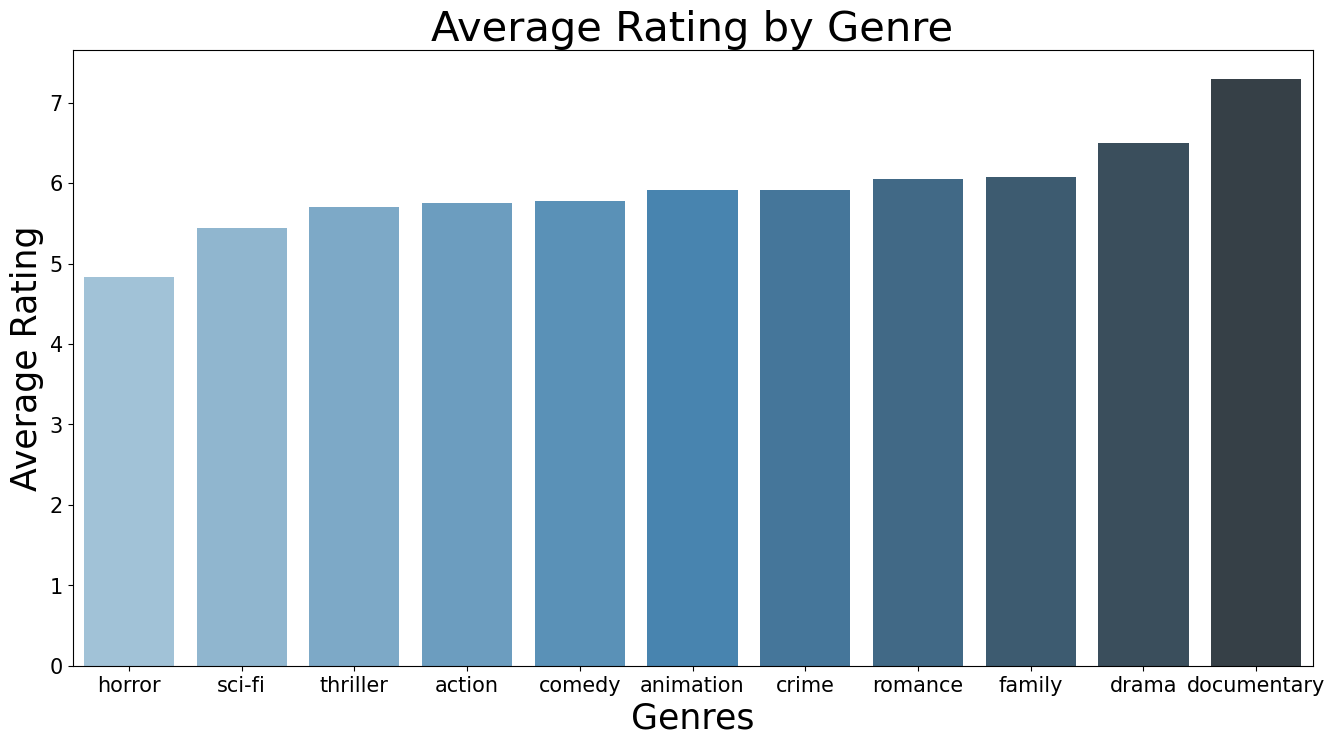

In [34]:
import numpy as np
plt.figure(figsize=(16,8))
sns.barplot(data = genre_means, x='genre', y='rating', palette='Blues_d')
plt.xlabel('Genres', fontsize=25)
plt.ylabel('Average Rating', fontsize=25)
plt.title('Average Rating by Genre', fontsize=30)
plt.tick_params(labelsize=15)
plt.show()


Analysis of average rating by genre shows Horror movies have the worst rating of 4.83, while Documentaries have the highest rating of 7.29.

### Analysis of Movie Runtime Vs Average Rating

First we take a quick look at the first five rows of our dataframe. In this case we are using a dataframe built from a query of the SQL database where the movie_basics and movie_ratings tables are joined. The question we are currently concerned with exploring is whether there is a relationship between runtime in minutes and movie rating, so by joining these two tables we have access to the relevant features.

In [35]:
imbd_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119


Next, we take a look to see if there are any null values in our relevant features. Below we can see that there are a number of null values in runtime_minutes, as well as genres. We are not concerned with genres for the scope of this particular question, so we can leave those null values there. However, we must decide what to do with the null values amongst runtimes.

In [36]:
imbd_df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
movie_id              0
averagerating         0
numvotes              0
dtype: int64

In order to decide what to do with these null values, we pull up some general information about the dataframe and see that there are 73,856 total records. If 7,620 of these records have null runtime values, this is about 10% of our total data. Through consulting some online sources, we found that this toes the line on an amount of data that is acceptable to drop. However, we decided that we would rather drop the null records than fill them with mean or median in order to avoid skewing our data towards the center.

In [37]:
# Viewing total records in dataframe
imbd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   movie_id         73856 non-null  object 
 7   averagerating    73856 non-null  float64
 8   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.1+ MB


In [38]:
# Dropping records with null runtimes and creating a new, cleaned, dataframe
imdbdf_clean_runtime = imbd_df.dropna(subset = ['runtime_minutes'])

Next, we take a look at some descriptive statistics for our cleaned dataframe to see if there are any outliers:

In [39]:
imdbdf_clean_runtime.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,66236.000000,66236.000000,66236.000000,6.623600e+04
mean,2014.252687,94.654040,6.321925,3.924085e+03
std,2.600352,208.574111,1.458443,3.196486e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.100000e+01
75%,2016.000000,104.000000,7.300000,3.470000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In deciding specifically what to consider an outlier for this set of data, we found that the generally accepted statistical definition is taking 1.5 times the IQR (range between 25th and 75th quantile) and adding it or subtracting it from those quantiles respectively. In doing this, we can consider all data points above a runtime of 138.5 and below a runtime of 46.5 to be outliers.

Here we decide to adjust our SQL query and put it into a new dataframe. We group the records by runtime in minutes from the movie_basics table, as it can be considered a categorical value, and then take the average of average ratings from the movie_ratings table. By doing this, we can see the average rating for a movie of each length in minutes and explore the relationship between these two features. We then filter this dataframe to only include movies with runtimes within the range of outliers we just established.

In [40]:
imdbdf_groupby_runtime = pd.read_sql("""
SELECT b.runtime_minutes, AVG(r.averagerating)
FROM movie_basics b
JOIN movie_ratings r
ON b.movie_id = r.movie_id
WHERE b.runtime_minutes BETWEEN 46.5 AND 138.5
GROUP BY b.runtime_minutes
ORDER BY AVG(r.averagerating) DESC
""", conn)

In [41]:
# Seeing if there are any null values in the dataframe.
imdbdf_groupby_runtime.isna().sum()

runtime_minutes         0
AVG(r.averagerating)    0
dtype: int64

There are no null values in our new dataframe, so we can proceed with looking at some descriptive statistics:

In [42]:
imdbdf_groupby_runtime.describe()

,runtime_minutes,AVG(r.averagerating)
count,92.00000,92.000000
mean,92.50000,6.478021
std,26.70206,0.327495
min,47.00000,5.987357
25%,69.75000,6.242092
50%,92.50000,6.402699
75%,115.25000,6.618258
max,138.00000,7.288060


With this new dataframe, we can calculate the correlation between runtime in minutes and the average rating for a movie with said runtime:

In [43]:
imdbdf_groupby_runtime.corr()

,runtime_minutes,AVG(r.averagerating)
runtime_minutes,1.000000,-0.535714
AVG(r.averagerating),-0.535714,1.000000


-0.536 is generally accepted as a moderate negative correlation, which seems to suggest that shorter movies tend to have higher ratings. We can make a scatterplot of average rating by runtime in minutes using this dataframe, to see if this trend is visually apparent.

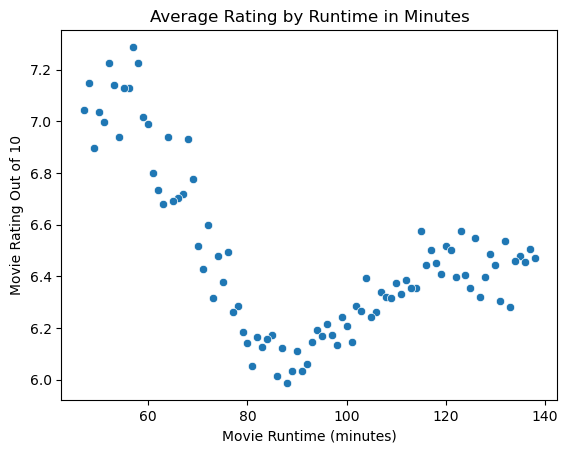

In [44]:
ax = sns.scatterplot(x='runtime_minutes',
                y='AVG(r.averagerating)', 
                data=imdbdf_groupby_runtime).set(title='Average Rating by Runtime in Minutes', 
                                                         xlabel = 'Movie Runtime (minutes)', 
                                                         ylabel = 'Movie Rating Out of 10')

As we can see, movies with shorter runtimes, in particular those under an hour long, do seem to have higher ratings. Qualitatively, we can see that ratings steadily decrease until bottoming out around 80-100 minutes, after which they steadily increase once more until stabilizing around 120 minutes.

However, we need to consider that the points in this scatter plot are not weighed evenly - indeed, some runtime categories may have very few movies of that length, which could also skew our data. We hopefully took care of some of this by filtering to remove our outliers, but perhaps we can get more granular with our data restriction.

In order to do this, we made a new dataframe from a new SQL query where the count of runtime_minutes is included as a factor. This way, we can prevent the inclusion of movie runtime categories that only have a very small amount of movies in the category (i.e. amount of movies with a specific runtime) which could potentially be skewing our data. We chose to limit the data to movie runtimes with over 100 movies that have that particular runtime, based on the accepted definition of a valid sample size according to tools4dev.org.

In [45]:
imdbdf_groupby_runtime_with_counts = pd.read_sql("""
SELECT b.runtime_minutes, AVG(r.averagerating), COUNT(b.runtime_minutes) number_movies
FROM movie_basics b
JOIN movie_ratings r
ON b.movie_id = r.movie_id
WHERE b.runtime_minutes BETWEEN 46.5 AND 138.5
GROUP BY b.runtime_minutes
HAVING COUNT(b.runtime_minutes) > 100
ORDER BY COUNT(b.runtime_minutes) DESC
""", conn)

In [46]:
# Sanity check to make sure the filtering worked
imdbdf_groupby_runtime_with_counts

,runtime_minutes,AVG(r.averagerating),number_movies
0,90.0,6.111050,4742
1,80.0,6.143675,2166
2,85.0,6.171220,2057
3,100.0,6.208942,1957
4,95.0,6.168598,1933
...,...,...,...
87,131.0,6.304698,149
88,51.0,6.995775,142
89,136.0,6.457143,140
90,47.0,7.044961,129


We then take another look at the correlation between runtime and average rating, and we can see that it has stayed the same upon adding that further restriction to our dataframe. We can now confidently say that the correlation between runtime in minutes and average rating for movies in this dataset is -0.536, a moderate negative correlation.

In [47]:
imdbdf_groupby_runtime_with_counts.corr()

,runtime_minutes,AVG(r.averagerating),number_movies
runtime_minutes,1.000000,-0.535714,-0.037812
AVG(r.averagerating),-0.535714,1.000000,-0.561770
number_movies,-0.037812,-0.561770,1.000000


We plot one more time, and we can see that the graph has stayed largely the same, if not identical.

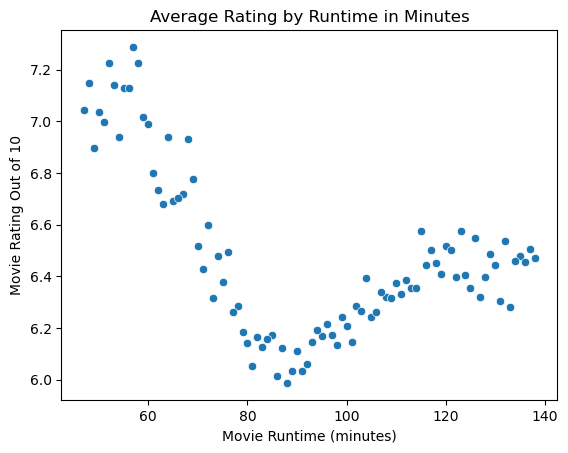

In [48]:
ax = sns.scatterplot(x='runtime_minutes',
                y='AVG(r.averagerating)', 
                data=imdbdf_groupby_runtime_with_counts).set(title='Average Rating by Runtime in Minutes', 
                                                         xlabel = 'Movie Runtime (minutes)', 
                                                         ylabel = 'Movie Rating Out of 10')

For context, we've made one final graph including the number of movies with each runtime. As we can see, the larger points in the scatterplot below correspond to movie runtime categories that have more movies of said runtime. Analyzing this, it is clear that there are significantly more movies with runtimes between 80 and 100 minutes than those with runtimes at the edges of the plot. That said, it is still worth noting that movies analyzed with a runtime around 60 minutes consistently rate higher than those with a runtime between 80 and 100 minutes. We also see a second peak in our distribution, with movies aroundf 120 minutes rating higher than those in the middle as well.

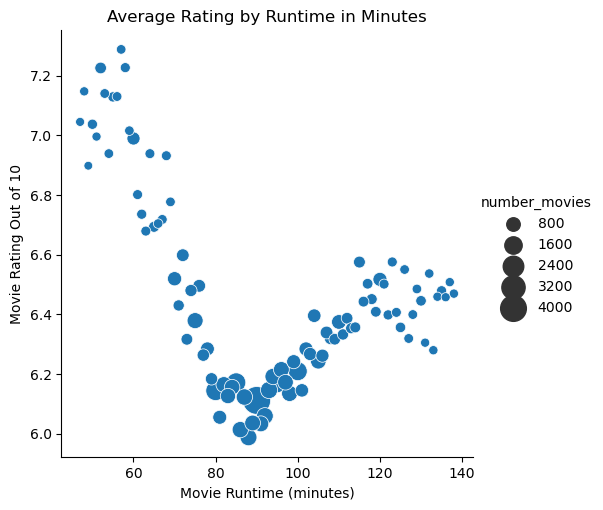

In [49]:
ax = sns.relplot(x='runtime_minutes',
                y='AVG(r.averagerating)',
                size = 'number_movies',
                sizes = (40, 400),
                data=imdbdf_groupby_runtime_with_counts).set(title='Average Rating by Runtime in Minutes', 
                                                         xlabel = 'Movie Runtime (minutes)', 
                                                         ylabel = 'Movie Rating Out of 10')

Taking this data into consideration, we can offer a recommendation to Microsoft that producing shorter movies under 60 minutes are most likely to be received positively. However, producing movies around 120 minutes are possibly more well received than those between 80 and 100 minutes.

### Data Analysis (Budget and Gross)
    
The following data sets were prepared to answer the questions, "Is there a relationship between production budget and rating?" and "Does production budget appear to affect the world-wide gross?". The majority of the following code is cleaning and merging The Numbers data set containing information about production costs and gross with the IMDB data set which contains information about movie ratings. These choices will help to make informed decisions on the primary focuses for future success.

#### Step 1 (Financial Data vs. Rating Data)
The first step is to create copies of the data frames, reformat the `release_date` to `year` (to match `start_year` in imbdu), and remove unwanted columns.

In [50]:
tnu_df = tn_df.copy()
imbdu_df = imbd_df.copy()

    #creating new dataframes to find matching movies in both dataframes
    
tnu_df['year'] = pd.DatetimeIndex(tnu_df['release_date']).year

    #converting the release date into year format
    
tnu_df = tnu_df.drop(columns = ['id','release_date'])
imbdu_df = imbdu_df.drop(columns = ['movie_id',
                                    'original_title',
                                    'movie_id',
                                    'genres'])

    #cleaning the dataframes to only have necessary columns

#### Step 2
Next, the movie names and year need to be combined for each dataframe to have an unique identifier between them.

In [51]:
tnu_df['unique'] = \
tnu_df['movie'].str.cat(tnu_df['year'].astype(str), sep = ' ')
imbdu_df['unique'] = \
imbdu_df['primary_title'].str.cat(imbdu_df['start_year'].astype(str), sep = ' ')

    #creating a new column in each df called unique which combines the
    #movie and the year. this is the first step in removing duplicate movies

#### Step 3
Now that the dataframes have matching identifiers, the movies in the data frame need to be matched.

In [52]:
tnu_df = tnu_df[tnu_df['unique'].isin(list(imbdu_df['unique']))]
imbdu_df = imbdu_df[imbdu_df['unique'].isin(tnu_df['unique'])]

    #checking the dfs against eachother and ending with only the movies that
    #are within both dfs

#### Step 4
The IMDB dataframe still has duplicate values as it draws from a much larger data set than the Numbers does. We will assume that the data in the Numbers corresponds to the most popular movies in the IMBD data set.

In [53]:
imbdu_df = imbdu_df.sort_values(by='numvotes', ascending=False)
imbdu_df = imbdu_df.drop_duplicates(subset='unique')

    #sorting by number of votes and dropping duplicates. given that tnu_df 
    #represents a smaller data set, it is very likely that the matching
    #movies from the imbdu data set would be the most popular

#### Step 5
Now that the duplicates are removed, we will do some final cleaning before merging the data sets.

In [54]:
imbdu_df = imbdu_df.drop(columns=['start_year', 'primary_title'])
tnu_df = tnu_df.drop(columns = ['movie', 'year'])

    #more data cleaning to prepare for a cleaned, merged table
    
cols = ['unique', 'production_budget',
        'domestic_gross', 'worldwide_gross']

     #rearranging the columns so that the unique film is first
    
tnu_df = tnu_df[cols]

#### Step 6
The data sets are cleaned and ready to merge.

In [55]:
df_analysis = pd.merge(tnu_df,imbdu_df)

    #merging the two tables into one

#### Step 7
Finally, the columns are rearraged and the final table is presented.

In [56]:
cols = ['unique', 'production_budget',
        'domestic_gross', 'worldwide_gross',
        'runtime_minutes', 'averagerating', 'numvotes']
df_analysis = df_analysis[cols]

    #rearranging the columns so that the unique film is first
    
df_analysis

,unique,production_budget,domestic_gross,worldwide_gross,runtime_minutes,averagerating,numvotes
0,Pirates of the Caribbean: On Stranger Tides 2011,"$410,600,000","$241,063,875","$1,045,663,875",136.0,6.6,447624
1,Dark Phoenix 2019,"$350,000,000","$42,762,350","$149,762,350",113.0,6.0,24451
2,Avengers: Age of Ultron 2015,"$330,600,000","$459,005,868","$1,403,013,963",141.0,7.3,665594
3,Avengers: Infinity War 2018,"$300,000,000","$678,815,482","$2,048,134,200",149.0,8.5,670926
4,Justice League 2017,"$300,000,000","$229,024,295","$655,945,209",120.0,6.5,329135
...,...,...,...,...,...,...,...
1457,Emily 2017,"$27,000","$3,547","$3,547",83.0,6.8,13
1458,Exeter 2015,"$25,000",$0,"$489,792",91.0,4.5,5156
1459,Dutch Kills 2015,"$25,000",$0,$0,90.0,5.1,82
1460,The Ridges 2011,"$17,300",$0,$0,89.0,2.9,127


#### Financial Data Comparison
The following cleaning is for a comparison of `production_budget` with the `domestic_gross` and `worldwide_gross`.

In [57]:
tnb_df = tn_df.copy()
tnb_df = tnb_df.drop(columns = ['release_date', 'id'])
    #cleaning df for prod budget vs. gross. using a
    #seperate df as this contains more values
tnb_df

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...
5777,Red 11,"$7,000",$0,$0
5778,Following,"$6,000","$48,482","$240,495"
5779,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,A Plague So Pleasant,"$1,400",$0,$0


#### Formatting for Modelling
The following cell reformat the `production_budget`,`domestic_gross`, and `worldwide_gross` columns so that they can be used to model and analyse the data.

In [58]:
def clean(dataframe, column_name):

    #defining a function that removes $ and , and divides by 1.
    #million for clean models
    
    dataframe[column_name] = \
    dataframe[column_name].replace('[\$,]',
                                    '', regex=True).astype(float)
    dataframe[column_name] = dataframe[column_name]/1000000

    return dataframe

clean(df_analysis, 'production_budget')
clean(df_analysis, 'worldwide_gross')
clean(df_analysis, 'domestic_gross')
clean(tnb_df, 'production_budget')
clean(tnb_df, 'worldwide_gross')
clean(tnb_df, 'domestic_gross')
clean(df_analysis, 'numvotes');

#clean all necessary df/column combos for data modelling.

### Data Modelling (Budget and Gross)
The following cells look at the correlations and plots relating to the movie budgets and movie grosses to make informed recommendations.

In [59]:
df_analysis.corr()

,production_budget,domestic_gross,worldwide_gross,runtime_minutes,averagerating,numvotes
production_budget,1.000000,0.711554,0.785485,0.375025,0.226273,0.549558
domestic_gross,0.711554,1.000000,0.945085,0.318571,0.328727,0.668699
worldwide_gross,0.785485,0.945085,1.000000,0.329017,0.310343,0.656622
runtime_minutes,0.375025,0.318571,0.329017,1.000000,0.408142,0.428105
averagerating,0.226273,0.328727,0.310343,0.408142,1.000000,0.499399
numvotes,0.549558,0.668699,0.656622,0.428105,0.499399,1.000000


The above table shows the correlations between the variables in `df_analysis`. We will ignore the correlations between `production_budget` and `worldwide_gross`/`domestic_gross` as these will be explored within a larger data set. We will focus on `production_budget` vs. `averagerating`, `worldwide_gross` vs. `numvotes`, and `worldwide_gross` vs. `runtime_minutes`.

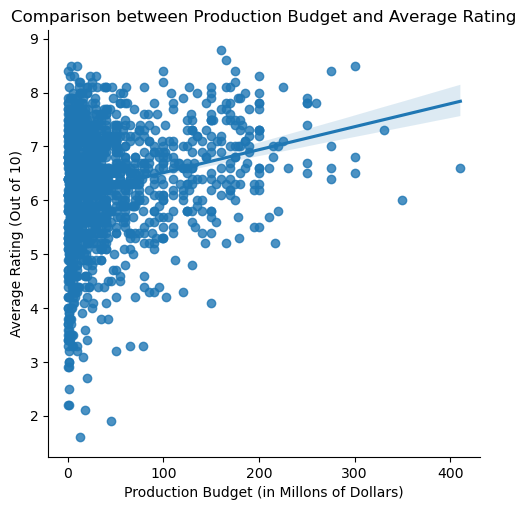

In [60]:
ax = sns.lmplot(x='production_budget', y='averagerating', data=df_analysis)
ax.set(xlabel='Production Budget (in Millons of Dollars)', 
       ylabel='Average Rating (Out of 10)', 
       title="Comparison between Production Budget and Average Rating");

As seen above, the correlation between `production_budget` and `averagerating` is 0.226273 which indicates a weak positive relationship; therefore, there does not appear to be a strong relationship between the two. Additionally, looking at the above graph does not indicate any other apparent patterns. Therefore, it does not appear that a higher production budget implies a better quality movie.

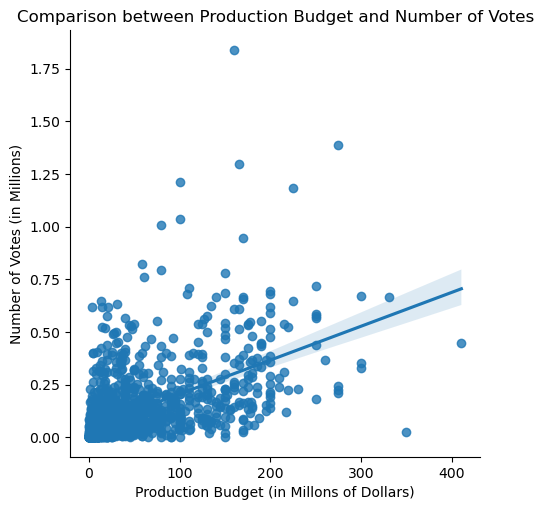

In [61]:
ax = sns.lmplot(x='production_budget', y='numvotes', data=df_analysis)
ax.set(xlabel='Production Budget (in Millons of Dollars)', 
       ylabel='Number of Votes (in Millions)', 
       title="Comparison between Production Budget and Number of Votes");

As seen above, the correlation between `production_budget` and `numvotes` is 0.549558 which indicates a moderate positive relationship, implying that there is some relationship between the two. There appears to be a large clumping of values in the lower left; however, this is to be expected as high budget and extremely popular movies are uncommon. Overall, it appears that a higher production budget impacts the popularity of the movie. Note: The popularity of the movie does not imply whether the movie is received well or not; but rather, that the movie receives a larger number of votes i.e. public attention.

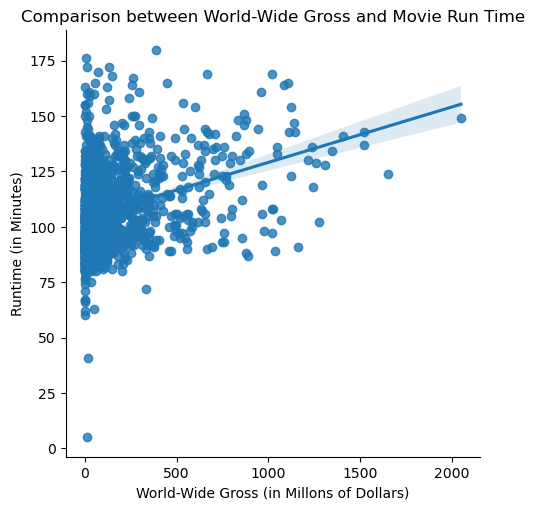

In [62]:
ax = sns.lmplot(x='worldwide_gross', y='runtime_minutes', data=df_analysis)
ax.set(xlabel='World-Wide Gross (in Millons of Dollars)', 
       ylabel='Runtime (in Minutes)', 
       title="Comparison between World-Wide Gross and Movie Run Time");

As seen above, the correlation between `worldwide_gross` and `runtime_minutes` is 0.329017 which indicates a weak positive relationship, implying that there is not a strong relationship between the two. An analysis of the graph does not show any other interesting patterns or relationship. We can conclude that the runtime does not affect the total gross of the movie.

In [63]:
tnb_df.corr()

,production_budget,domestic_gross,worldwide_gross
production_budget,1.000000,0.685682,0.748306
domestic_gross,0.685682,1.000000,0.938853
worldwide_gross,0.748306,0.938853,1.000000


The above table shows the correlations between the variables in `tnb_df`. We will examine the correlations between `production_budget` and `worldwide_gross`/`domestic_gross` with this larger data set. 

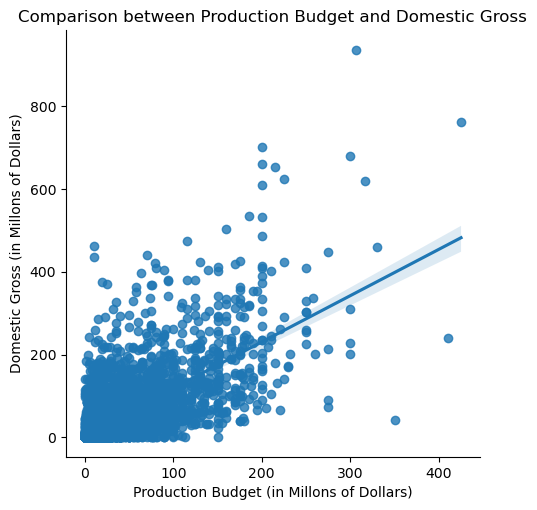

In [64]:
ax = sns.lmplot(x='production_budget', y='domestic_gross', data=tnb_df)
ax.set(xlabel='Production Budget (in Millons of Dollars)', 
       ylabel='Domestic Gross (in Millons of Dollars)', 
       title="Comparison between Production Budget and Domestic Gross");

As seen above, the correlation between `production_budget` and `domestic_gross` is 0.685682 which indicates a moderate-strong positive relationship, implying that the production budget has a positive impact on the domestic gross. It appears from the correlation and the graph that higher grossing movies will general generate a higher gross in a domestic market.

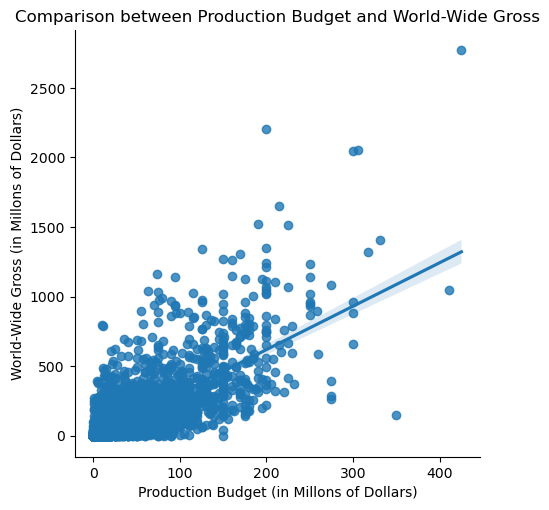

In [65]:
ax = sns.lmplot(x='production_budget', y='worldwide_gross', data=tnb_df)
ax.set(xlabel='Production Budget (in Millons of Dollars)', 
       ylabel='World-Wide Gross (in Millons of Dollars)', 
       title="Comparison between Production Budget and World-Wide Gross");

As seen above, the correlation between `production_budget` and `worldwide_gross` is 0.748306 which indicates a strong positive relationship, implying that the production budget has a positive impact on the world-wide gross. As mentioned in the previous graph analysis, it appears that production budget has a slightly stronger impact on the world-wide gross; therefore, marketing higher budget movies to a global market will generally yield a higher overall gross. This implies higher overall profits for the company.

## Evaluation

The purpose of this study is to make recommendations for Microsoft's entry into the movie industry. We sought to answer questions about various movie metrics and have come to the following evalusations:

An analysis of genre and average ratings showed that documentaries receive the highest average rating while horror movies receive the lowest average rating.
    
An analysis of runtimes and ratings showed that movies less than 60 minutes long as well as around the 120-minute mark have higher average ratings.

An analysis of the production budget and various metrics found that the production budget has a strong positive relationship with domestic and worldwide gross and     production budget has a moderate positive relationship with overall popularity, represented by the number of rating votes for a movie.

## Conclusion

From the above evaluations, it appears that making documentaries around 60 minutes or 120 minutes will yield the highest ratings. This will build the popularity of the studio as they will have a high probability of releasing well-received movies. In addition, a moderate to high production budget will further increase popularity and will also allow for a higher total gross. One limitation of this study is that there was no available data for distribution and advertising costs. Due to this limitation, we cannot recommend based on expected profits and cannot recommend whether to expand into a global market, as there is no data involving the associated costs in doing so and if they outweigh the additional profits. Another limitation of this study was that, due to time constraints, crossover movies, movies with more than one genre, were not considered. A recommended follow-up study would contain data on the distribution and advertising costs as well as an analysis including crossover movies.